<a href="https://colab.research.google.com/github/Sarumathi-G23/Long-Short-term-memory-RNN/blob/main/Handwritten_classfication_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Shape check
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("x_test shape:", x_test.shape)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [11]:
model = Sequential([
    LSTM(128, input_shape=(28, 28), return_sequences=True),
    Dropout(0.2),

    LSTM(64),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,442 (509.54 KB)

 Trainable params: 130,442 (509.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 148ms/step - accuracy: 0.6363 - loss: 1.0712 - val_accuracy: 0.9325 - val_loss: 0.2136
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.9414 - loss: 0.2000 - val_accuracy: 0.9641 - val_loss: 0.1269
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9637 - loss: 0.1270 - val_accuracy: 0.9692 - val_loss: 0.1059
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 145ms/step - accuracy: 0.9715 - loss: 0.0980 - val_accuracy: 0.9766 - val_loss: 0.0782
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.9787 - loss: 0.0736 - val_accuracy: 0.9798 - val_loss: 0.0686
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 144ms/step - accuracy: 0.9811 - loss: 0.0645 - val_accuracy: 0.9821 - val_loss: 0.0635
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.9847 - loss: 0.0508 - val_accuracy: 0.9820 - val_loss: 0.0633
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - accuracy: 0.9872 - loss: 0

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9767 - loss: 0.0757
Test Accuracy: 0.9810000061988831


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
Predicted Digit: 1


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

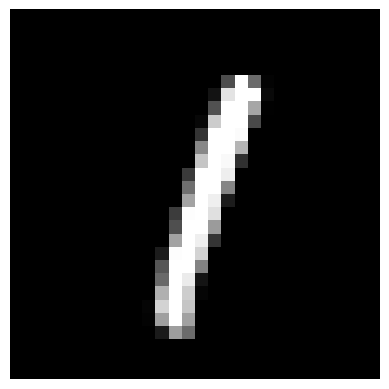

In [15]:
import matplotlib.pyplot as plt
index = 5
sample_image = x_test[index]

# LSTM expects 3D input → add batch dimension
sample_image = np.expand_dims(sample_image, axis=0)

# Predict
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

print("Predicted Digit:", predicted_label)

# Show image
plt.imshow(sample_image[0], cmap='gray')
plt.axis('off')
